# Проект: Принятие решений в бизнесе.

## Описание проекта.

Я аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Нужно приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

## Цель проекта.
Приоритизировать гипотезы и принять решение по результатам A/B-теста.

## Описание данных.

Данные для первой части

Файл /datasets/hypothesis.csv. 

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

Файл /datasets/orders.csv.

* transactionId — идентификатор заказа;
*  — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## План работы:

* Загрузим данные и подготовим их к анализу:

Пути к файлам
1. /datasets/hypothesis.csv;
2. /datasets/orders.csv;
3. /datasets/visitors.csv.

Изучим данные и выполним предобработку:
1. Обработаем пропуски и дубликаты.
2. Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям.

Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача

* Шаг 1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Шаг 2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Шаг 3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача

* Шаг 1. Проанализируйте A/B-тест:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
7. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
8. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
9. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
10. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
11. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
14. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
15. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

* Шаг 2. Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

### Загрузим данные и подготовим их к анализу.

#### Импортируем необходимые для исследования библиотеки.

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import datetime as dt

In [2]:
hypothesis,orders,visitors = (
    pd.read_csv('/datasets/hypothesis.csv'),  # гипотезы
    pd.read_csv('/datasets/orders.csv'),  # журнал заказов
    pd.read_csv('/datasets/visitors.csv'),  # количество пользователей в указанную дату в указанной группе A/B-теста
)
hypothesis.info(),orders.info(),visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   

(None, None, None)

In [3]:
display(hypothesis.head(),orders.head(),visitors.head())
pd.set_option('display.max_columns', None)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


После первичного знакомства с данными можем сказать:
* в датафреймах нет пропусков;
* названия столбцов нужно привести к общему стилю;
* тип данных в date в фреймах visitors и orders необходимо заменить на datetime, сделаем это позже при анализе А/В теста.

#### Приведем названия колонок к нижнему регистру, общему стилю и проверим результат:

In [4]:
hypothesis.columns = [x.lower().replace(' ', '_') for x in hypothesis.columns]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
visitors.columns = [x.lower().replace(' ', '_') for x in visitors.columns]
orders.rename(columns ={'transactionid': 'transaction_id', 'visitorid': 'visitor_id'}, inplace = True)

hypothesis.info(),orders.info(),visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns)

(None, None, None)

#### Проверим таблицы на наличие дубликатов.

In [5]:
display(hypothesis.duplicated().sum())
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

0

Дубликаты отсутствуют.

### Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

#### Шаг 1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.


In [6]:
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']).round(2)
pd.set_option("max_colwidth", 999)
print(hypothesis.sort_values(by='ICE',ascending=False))
print(hypothesis[['hypothesis','ICE']].sort_values(by='ICE',ascending=False))


                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

В результате применения фреймворка ICE - лидируют гипотезы с индексами 8, 0, 7.

#### Шаг 2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.


In [7]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']).round(2)
pd.set_option("max_colwidth", 999)
print(hypothesis.sort_values(by='RICE',ascending=False))
print(hypothesis[['hypothesis','RICE']].sort_values(by='RICE',ascending=False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

В результате применения фреймворка RICE - лидируют гипотезы с индексами 7, 2, 0.

#### Шаг 3. Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

В результате применения фреймворка ICE - лидируют гипотезы с индексами 8, 0, 7, а результате применения фреймворка RICE - лидируют гипотезы с индексами 7, 2, 0. 

Это произошло из-за высокого значения параметра reach у гипотез с индексами 7, 2, 0 по сравнению с гипотезами с индексами 8, 0, 7.

### Часть 2. Анализ A/B-теста.

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

#### Шаг 1. Проанализируем A/B-тест:


Создадим фрейм с коммулятивными данными.

In [8]:
#приведем столбцы к фармату datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

print(orders.head(5))
print(visitors.head(5))

#создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

#получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#получаем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head())

   transaction_id  visitor_id       date  revenue group
0      3667963787  3312258926 2019-08-15     1650     B
1      2804400009  3642806036 2019-08-15      730     B
2      2961555356  4069496402 2019-08-15      400     A
3      3797467345  1196621759 2019-08-15     9759     B
4      2282983706  2322279887 2019-08-15     2308     B
        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
2 2019-08-03     A       507
3 2019-08-04     A       717
4 2019-08-05     A       756
        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


##### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.


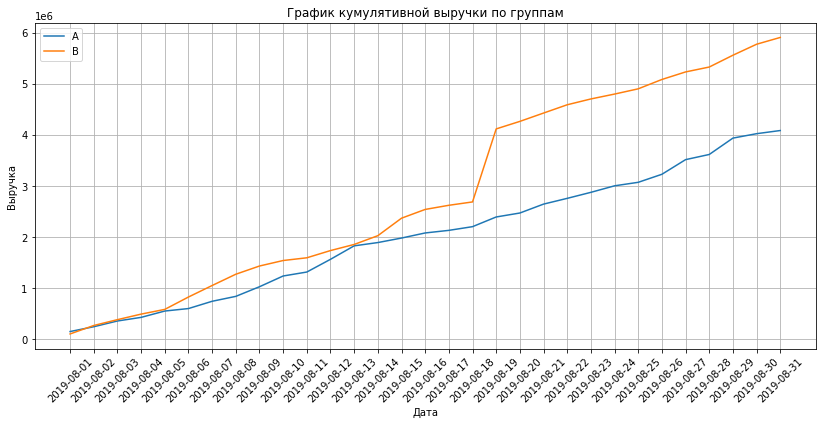

In [9]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(14, 6))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xticks(cumulativeRevenueA['date'].unique(), rotation=45)
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.show()

Вывод. Выручка по группе B выше чем в группе А со второго дня теста. Резкий скачек выручки 18 августа может быть связан с дорогими заказами и повышением количества заказов.

##### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.


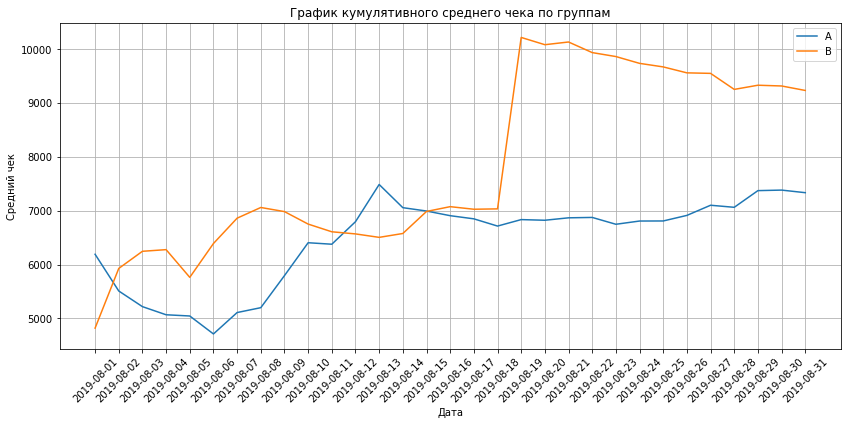

In [10]:
plt.figure(figsize=(14, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(cumulativeRevenueA['date'].unique(), rotation=45)
plt.legend() 
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid()
plt.show() 

Вывод. Средний чек по группе B выше чем в группе А со второго дня теста. Резкий скачек выручки 18 августа связан с дорогими заказами. Группа А находилась выше с 11 по 13 августа. К концу теста обе группы стабилизировались.

##### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.


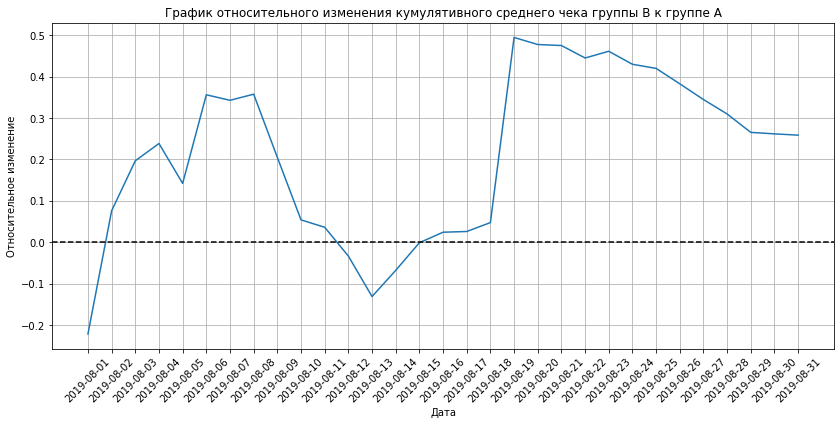

In [11]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(14, 6))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(cumulativeRevenueA['date'].unique(), rotation=45)
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.grid()
plt.show() 

Вывод. Видим резкие скачки с 2 августа и с 18 августа, они связаны с дорогими заказами.

##### Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.


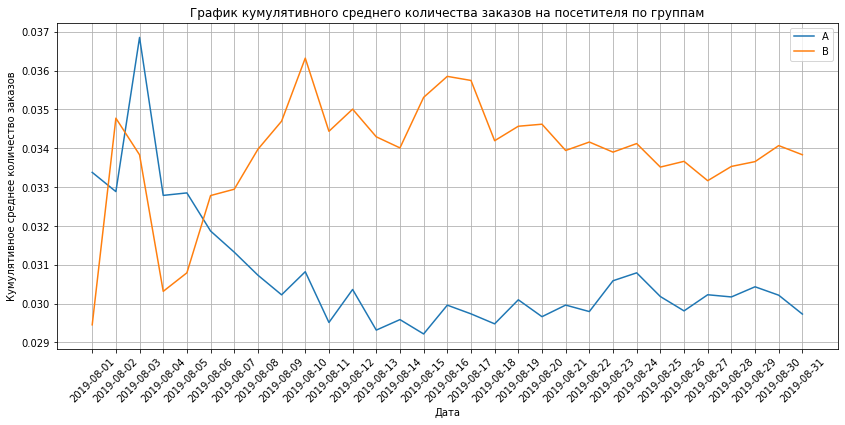

In [12]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(14, 6))
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xticks(cumulativeRevenueA['date'].unique(), rotation=45)
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов')
plt.grid()
plt.show() 

В начале теста группа А имела наибольшую конверсию, но с 5 августа группа В вышла вперед и сохранила лидерство до 31 августа.

##### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.Сделаем выводы и предположения.


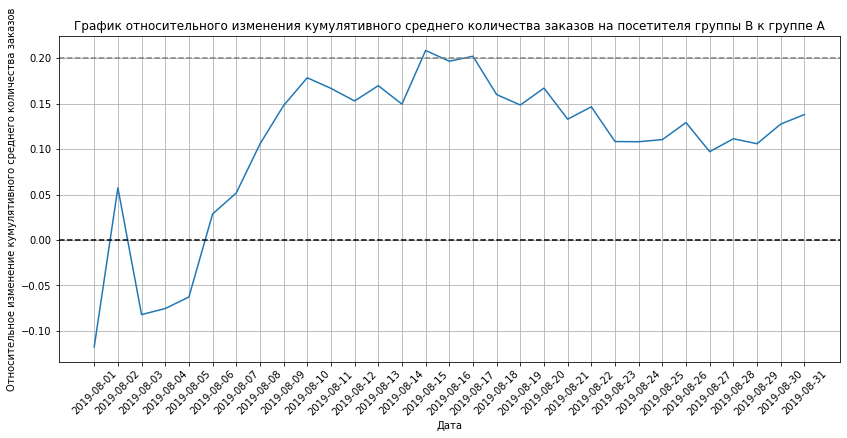

In [13]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(14, 6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xticks(cumulativeRevenueA['date'].unique(), rotation=45)
plt.xlabel('Дата')
plt.ylabel('Относительное изменение кумулятивного среднего количества заказов')
plt.grid()
plt.show() 

Вывод. График показывает, группа В лидирует с 5 по 31 августа.

##### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.


          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


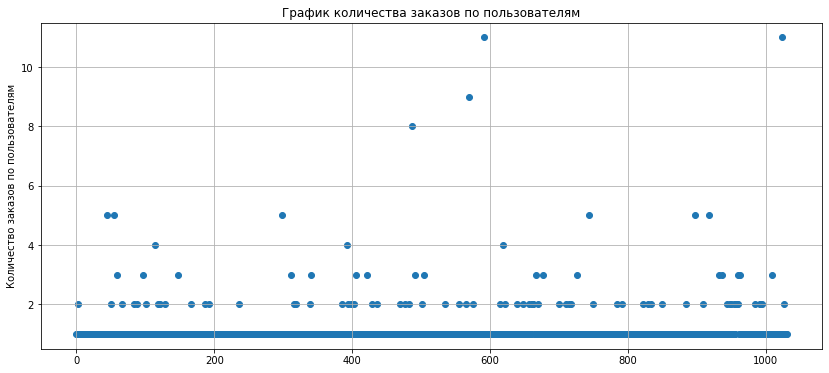

In [14]:
ordersByUsers = orders.groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique',})
ordersByUsers.columns = ['userId', 'orders']
print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

plt.figure(figsize=(14, 6))
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values,ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.ylabel('Количество заказов по пользователям')
plt.grid()
plt.show() 

Очень маленькое количество пользователей, сделавших больше 2-х заказов. 

##### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.


In [15]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) #находит перцентили.

[1. 2. 4.]


5% пользователей оформляли больше 2х заказов, 1% оформляли больше 4х заказов. Граница для определения аномальных пользователей более 2-х заказов.

##### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.


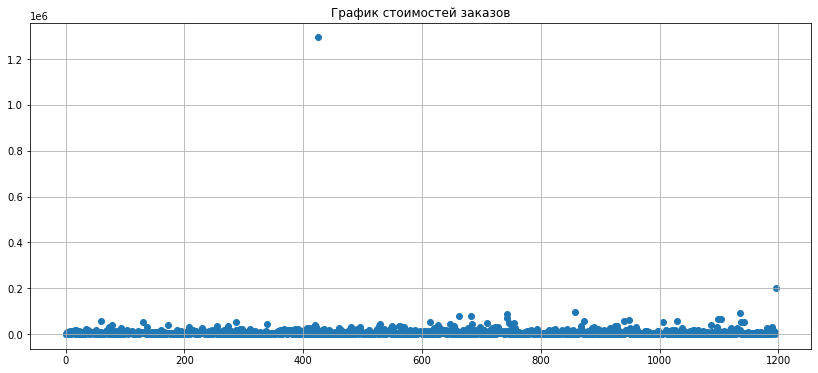

In [16]:
# серия из чисел от 0 до количества наблюдений в orders['revenue']
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(14, 6))
plt.scatter(x_values, orders['revenue']) 
plt.title('График стоимостей заказов')
plt.grid()
plt.show()

Видим аномальные значения на 200 000 и свыше 1,2 млн. 

##### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.


In [17]:
print(np.percentile(orders['revenue'] , [95, 99]))

[28000.  58233.2]


5% пользователей потратили более 28 000, 1% пользователей потратили более 58 200. Граница для определения аномальных заказов - 28 000.

##### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

Выборки будем проверять критерием Манна-Уитни. Значение alpha примем 0.05.

* Н0 - в среднем количестве заказов между группами нет статистически значимых различий
* Н1 - в среднем количестве заказов между группами существуют статистически значимые различия


In [18]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

print('alpha равно 0.05')

print("p-значение равно","{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост среднего группы В относительно конверсии группы А равно","{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

alpha равно 0.05
p-значение равно 0.01679
Относительный прирост среднего группы В относительно конверсии группы А равно 0.138


Вывод. p-value значительно меньше 0,05 - значит нулевую гипотезу следует отвергнуть. Анализ сырых данных показывает что в среднем количестве заказов между группами существут статистически значимые различия.

##### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по "сырым" данным. Сделаем выводы и предположения.

Выборки будем проверять критерием Манна-Уитни. Значение alpha примем 0.05.

* Н0 - в среднем чеке заказа между группами нет статистически значимых различий
* Н1 - в среднем чеке заказа между группами существуют статистически значимые различия


In [19]:
print('alpha равно 0.05')
print("p-значение равно",'{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительное различие среднего чека группы В относительно группы А равно",'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha равно 0.05
p-значение равно 0.729
Относительное различие среднего чека группы В относительно группы А равно 0.259


Вывод. p-value значительно больше 0,05 - значит нулевая гипотеза подтверждена. Анализ сырых данных показывает что относительное различие среднего чека группы В относительно группы А не имеет статистически значимых различий.

##### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

Выборки будем проверять критерием Манна-Уитни. Значение alpha примем 0.05.

* Н0 - в среднем количестве заказов между группами нет статистически значимых различий
* Н1 - в среднем количестве заказов между группами существуют статистически значимые различия


In [20]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'transaction_id']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'transaction_id']

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transaction_id'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['transaction_id'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

#print(abnormalUsers.head(5))

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('alpha равно 0.05')
print("p-значение равно",'{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный прирост среднего группы В относительно конверсии группы А равно",'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha равно 0.05
p-значение равно 0.013
Относительный прирост среднего группы В относительно конверсии группы А равно 0.173


Вывод. p-value значительно меньше 0,05 - значит нулевую гипотезу следует отвергнуть. Анализ очищенных данных показывает что в среднем количестве заказов между группами существут статистически значимые различия.

##### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

Выборки будем проверять критерием Манна-Уитни. Значение alpha примем 0.05.

* Н0 - в среднем чеке заказа между группами нет статистически значимых различий
* Н1 - в среднем чеке заказа между группами существуют статистически значимые различия



In [21]:
print('alpha равно 0.05')
print("p-значение равно",
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Относительное различие среднего чека группы В относительно группы А равно",
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

alpha равно 0.05
p-значение равно 0.738
Относительное различие среднего чека группы В относительно группы А равно -0.020


Вывод. p-value значительно больше 0,05 - значит нулевая гипотеза подтверждена. Анализ сырых данных показывает что относительное различие среднего чека группы В относительно группы А не имеет статистически значимых различий.

#### Шаг 2. Примем решение по результатам теста и объясним его. 

Варианты решений:

* Остановить тест, зафиксировать победу одной из групп.
* Остановить тест, зафиксировать отсутствие различий между группами.
* Продолжить тест.

На основании данных:

1. Различие в среднем количестве заказов между группами по "очищенным" и "сырым" данным - статистически значимое.
2. Различие в среднем чеке между группами по "очищенным" и "сырым" данным - статистически не значимое.
3. Различие среднего количества заказов на посетителя исходя из графика, показывает что результаты группы B лучше группы A на 14%.

Нам следует остановить тест, зафиксировать победу группы В.

## Общий вывод.

Целью проекта было:
* приоритизировать гипотезы
* принять решение по результатам A/B-теста

Перед анализом данных мы провели предобработку:

* привели названия колонок к нижнему регистру и общему стилю;
* проверили данные на наличие дубликатов - дубликаты отсутствуют.

По фреймворку RICE приорететнее оказались гипотезы с индексами 7, 2, 0:

7. "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
2. "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
0. "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"

На основании данных:

1. Различие в среднем количестве заказов между группами по "очищенным" и "сырым" данным - статистически значимое.
2. Различие в среднем чеке между группами по "очищенным" и "сырым" данным - статистически не значимое.
3. Различие среднего количества заказов на посетителя исходя из графика, показывает что результаты группы B лучше группы A на 14%.

Нам следует остановить тест, зафиксировать победу группы В.
